In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dados_aluguel_ml_sao_paulo_preprocessado.csv')

In [3]:
df.head(2)

,zona,enderecos_lista,aluguel,area,quartos
0,norte,"Rua Yvorne, Lauzane Paulista, São Paulo Zona N...",930.0,35.0,1.0
1,norte,"Rua Aburá, Sítio Do Mandaqui, São Paulo Zona N...",940.0,50.0,2.0


C:\Users\fabio\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\fabio\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\fabio\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\fabio\Anaconda3\lib\site-packages\pandas\plotting\_matpl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BB7FF8F748>,
      dtype=object)

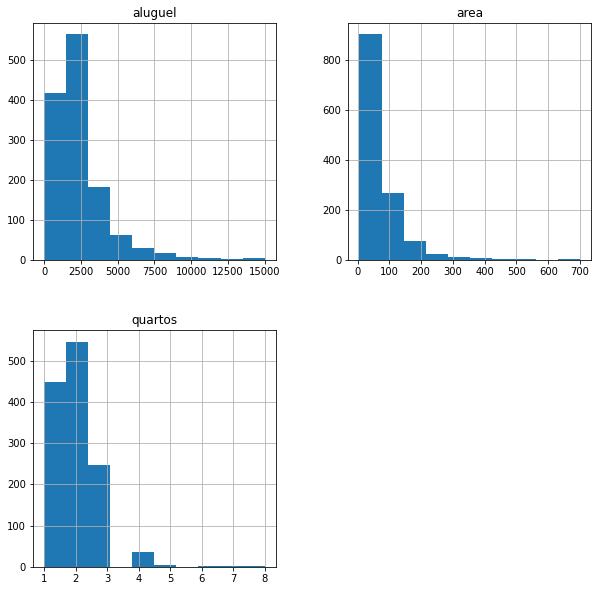

In [4]:
df.hist(figsize=(10,10),bins=10)

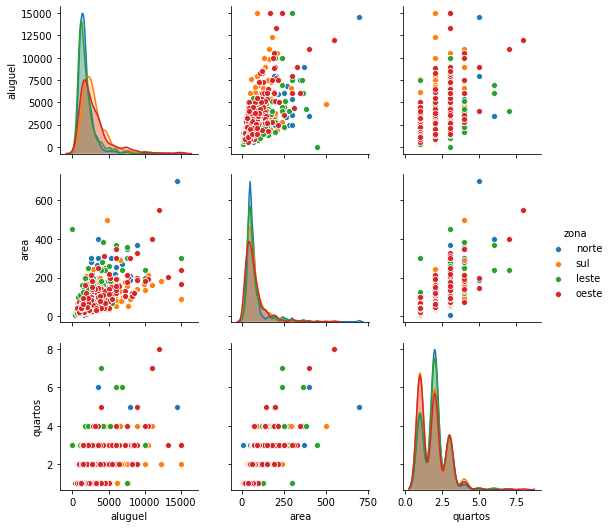

In [5]:
g = sns.pairplot(data=df,hue='zona')


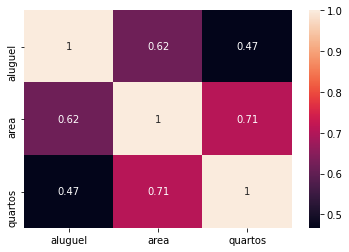

In [6]:
sns.heatmap(df.corr(), annot=True);

In [11]:
df_rdy = pd.read_csv('df_rdy.csv')

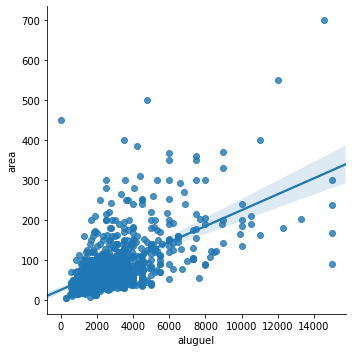

In [12]:
sns.lmplot(x='aluguel',y='area',data=df)

In [14]:
df_rdy.head()

,aluguel,area,quartos,latitude,longitude,zona_leste,zona_norte,zona_oeste,zona_sul
0,930.0,35.0,1.0,-23.472030,-46.642959,0,1,0,0
1,940.0,50.0,2.0,-23.485006,-46.662995,0,1,0,0
2,2900.0,74.0,3.0,-23.499899,-46.743401,0,1,0,0
3,1300.0,94.0,2.0,-23.503212,-46.599148,0,1,0,0
4,1650.0,61.0,2.0,-23.195376,-45.882711,0,1,0,0


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_rdy.drop('aluguel',axis=1).values, df_rdy['aluguel'].values.reshape(-1, 1), test_size=0.5, random_state=42)

In [31]:
y_train.shape

(592, 1)

In [32]:
y_test.shape

(593, 1)

In [33]:
import sys, numpy; print(numpy.__version__, sys.version)

1.19.3 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


In [34]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
y_pred.shape

(593, 1)

In [37]:
mean_squared_error(y_test,y_pred)

2152531.1959911147